# Importing libraries and classes

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tabulate import tabulate

from sklearn.metrics import median_absolute_error, max_error, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from Utils import Utils

from DecisionTreeRegressor import DecisionTreeRegressor
from RandomForestRegressor import RandomForestRegressor
from LinearRegression import LinearRegression

# Reading and splitting the data

In [33]:
df = pd.read_csv('./NSO_Population_Sex_dataset/NSO_POPULATION_DATA_CLEANED.csv')

feature_cols = ['District', 'Sex', 'Year', 'Population_Growth_Rate','Average_Population']
X = pd.get_dummies(df[feature_cols], columns=['District', 'Sex'])
y = df["Population"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Custom Implementations - Decision Tree, Random Forest, Linear Regression

In [34]:
# Decision Trees Hyperparameter tuning
Custom_Implementations_Number_Of_Runs = 50
Custom_Decision_Tree_Best_MSE_Over_Runs = float('inf')
Custom_Decision_Tree_Best_Model_Over_Runs = None
Custom_Decision_Tree_Best_Parameters_Over_Runs = None

Custom_Decision_Tree_Parameters = {
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20],
    'max_depth': [10, 25, 50, 75, 100, 125, 150, 175, 200]
}

run_iteration = 0
for run in range(Custom_Implementations_Number_Of_Runs):
    # Initialise variables for each run
    Custom_Decision_Tree_Best_MSE = float('inf')
    Custom_Decision_Tree_Best_Model = None
    Custom_Decision_Tree_Best_Parameters = None

    # Iterate over all combinations of Decision Tree hyperparameters
    for min_samples_split in Custom_Decision_Tree_Parameters['min_samples_split']:
        for max_depth in Custom_Decision_Tree_Parameters['max_depth']:
                # Instantiate and train your custom Decision Tree Regressor
                Custom_Decision_Tree_Regressor_Temp = DecisionTreeRegressor(min_samples_split=min_samples_split, max_depth=max_depth)
                Custom_Decision_Tree_Regressor_Temp.fit(X_train.values, y_train.values)

                # Make predictions
                Custom_Decision_Tree_Regressor_Temp_Predictions = Custom_Decision_Tree_Regressor_Temp.predict(X_test.values)

                # Calculate Mean Squared Error
                Custom_Decision_Tree_Regressor_Temp_MSE = mean_squared_error(y_test, Custom_Decision_Tree_Regressor_Temp_Predictions)

                # Check if current combination of hyperparameters gives a better result
                if Custom_Decision_Tree_Regressor_Temp_MSE < Custom_Decision_Tree_Best_MSE:
                    Custom_Decision_Tree_Best_MSE = Custom_Decision_Tree_Regressor_Temp_MSE
                    Custom_Decision_Tree_Best_Model = Custom_Decision_Tree_Regressor_Temp
                    Custom_Decision_Tree_Best_Parameters = {'min_samples_split': min_samples_split, 'max_depth': max_depth}

    if Custom_Decision_Tree_Best_MSE < Custom_Decision_Tree_Best_MSE_Over_Runs:
        Custom_Decision_Tree_Best_MSE_Over_Runs = Custom_Decision_Tree_Best_MSE
        Custom_Decision_Tree_Best_Model_Over_Runs = Custom_Decision_Tree_Best_Model
        Custom_Decision_Tree_Best_Parameters_Over_Runs = Custom_Decision_Tree_Best_Parameters

    run_iteration = run_iteration + 1
    print("Decision Tree Regressor Hyperparameter tuning execution: ", run_iteration)    

print("Best Decision Tree Regressor Parameters over 50 runs:", Custom_Decision_Tree_Best_Parameters_Over_Runs)

Decision Tree Regressor Hyperparameter tuning execution:  1
Decision Tree Regressor Hyperparameter tuning execution:  2
Decision Tree Regressor Hyperparameter tuning execution:  3
Decision Tree Regressor Hyperparameter tuning execution:  4
Decision Tree Regressor Hyperparameter tuning execution:  5
Decision Tree Regressor Hyperparameter tuning execution:  6
Decision Tree Regressor Hyperparameter tuning execution:  7
Decision Tree Regressor Hyperparameter tuning execution:  8
Decision Tree Regressor Hyperparameter tuning execution:  9
Decision Tree Regressor Hyperparameter tuning execution:  10
Decision Tree Regressor Hyperparameter tuning execution:  11
Decision Tree Regressor Hyperparameter tuning execution:  12
Decision Tree Regressor Hyperparameter tuning execution:  13
Decision Tree Regressor Hyperparameter tuning execution:  14
Decision Tree Regressor Hyperparameter tuning execution:  15
Decision Tree Regressor Hyperparameter tuning execution:  16
Decision Tree Regressor Hyperpara

In [35]:
# Random Forest Hyperparameter Tuning
Custom_Implementations_Number_Of_Runs = 50
Custom_Random_Forest_Best_MSE_Over_Runs = float('inf')
Custom_Random_Forest_Best_Model_Over_Runs = None
Custom_Random_Forest_Best_Parameters_Over_Runs = None

Custom_Random_Forest_Parameters = {
    'n_estimators': [25, 50, 75, 100],
    'min_samples_split': [2, 5, 10],
    'max_depth': [25, 50, 75, 100]
}

run_iteration = 0
for run in range(Custom_Implementations_Number_Of_Runs):
    # Initialise variables for each run
    Custom_Random_Forest_Best_MSE = float('inf')
    Custom_Random_Forest_Best_Model = None
    Custom_Random_Forest_Best_Parameters = None

    # Iterate over all combinations of Random Forest hyperparameters
    for n_estimators in Custom_Random_Forest_Parameters['n_estimators']:
        for min_sample_split in Custom_Random_Forest_Parameters['min_samples_split']:
            for max_depth in Custom_Random_Forest_Parameters['max_depth']:
                # Instantiate and train your custom Random Forest Regressor
                # max_depth and min_samples_split were already found in the Decision Trees hyperparameter tuning
                Custom_Random_Forest_Regressor_Temp = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_sample_split)
                Custom_Random_Forest_Regressor_Temp.fit(X_train, y_train)

                # Make predictions
                Custom_Random_Forest_Regressor_Temp_Predictions = Custom_Random_Forest_Regressor_Temp.predict(X_test)

                # Calculate Mean Squared Error
                Custom_Random_Forest_Regressor_Temp_MSE = mean_squared_error(y_test, Custom_Random_Forest_Regressor_Temp_Predictions)

                # Check if the current combination of hyperparameters gives a better result
                if Custom_Random_Forest_Regressor_Temp_MSE < Custom_Random_Forest_Best_MSE:
                    Custom_Random_Forest_Best_MSE = Custom_Random_Forest_Regressor_Temp_MSE
                    Custom_Random_Forest_Best_Model = Custom_Random_Forest_Regressor_Temp
                    Custom_Random_Forest_Best_Parameters = {'n_estimators': n_estimators, 'min_samples_split': min_sample_split, 'max_depth': max_depth }

    if Custom_Random_Forest_Best_MSE < Custom_Random_Forest_Best_MSE_Over_Runs:
        Custom_Random_Forest_Best_MSE_Over_Runs = Custom_Random_Forest_Best_MSE
        Custom_Random_Forest_Best_Model_Over_Runs = Custom_Random_Forest_Best_Model
        Custom_Random_Forest_Best_Parameters_Over_Runs = Custom_Random_Forest_Best_Parameters

    run_iteration = run_iteration + 1
    print("Random Forest Regressor Hyperparameter tuning execution: ", run_iteration)    

print("Best Random Forest Regressor Parameters over 50 runs:", Custom_Random_Forest_Best_Parameters_Over_Runs)

Random Forest Regressor Hyperparameter tuning execution:  1
Random Forest Regressor Hyperparameter tuning execution:  2
Random Forest Regressor Hyperparameter tuning execution:  3
Random Forest Regressor Hyperparameter tuning execution:  4
Random Forest Regressor Hyperparameter tuning execution:  5
Random Forest Regressor Hyperparameter tuning execution:  6
Random Forest Regressor Hyperparameter tuning execution:  7
Random Forest Regressor Hyperparameter tuning execution:  8
Random Forest Regressor Hyperparameter tuning execution:  9
Random Forest Regressor Hyperparameter tuning execution:  10
Random Forest Regressor Hyperparameter tuning execution:  11
Random Forest Regressor Hyperparameter tuning execution:  12
Random Forest Regressor Hyperparameter tuning execution:  13
Random Forest Regressor Hyperparameter tuning execution:  14
Random Forest Regressor Hyperparameter tuning execution:  15
Random Forest Regressor Hyperparameter tuning execution:  16
Random Forest Regressor Hyperpara

In [36]:
# Linear Regression Hyperparameter tuning
Custom_Implementations_Number_Of_Runs = 50
Custom_Linear_Regression_Best_MSE_Over_Runs = float('inf')
Custom_Linear_Regression_Best_Model_Over_Runs = None
Custom_Linear_Regression_Best_Parameters_Over_Runs = None

Custom_Linear_Regression_Parameters = {
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'num_iterations': [50, 100, 250, 500, 750, 1000, 1250, 1500]
}

run_iteration = 0
for run in range(Custom_Implementations_Number_Of_Runs):
    # Initialise variables for each run
    Custom_Linear_Regression_Best_MSE = float('inf')
    Custom_Linear_Regression_Best_Model = None
    Custom_Linear_Regression_Best_Parameters = None

    # Iterate over all combinations of hyperparameters
    for learning_rate in Custom_Linear_Regression_Parameters['learning_rate']:
        for num_iterations in Custom_Linear_Regression_Parameters['num_iterations']:
            # Instantiate and train your custom Linear Regression
            Custom_Linear_Regression_Temp = LinearRegression(learning_rate=learning_rate, num_iterations=num_iterations)
            Custom_Linear_Regression_Temp.fit(X_train.values, y_train.values)

            # Make predictions
            Custom_Linear_Regression_Temp_Predictions = Custom_Linear_Regression_Temp.predict(X_test.values)

            # Calculate Mean Squared Error
            Custom_Linear_Regression_Temp_MSE = mean_squared_error(y_test, Custom_Linear_Regression_Temp_Predictions)

            # Check if the current combination of hyperparameters gives a better result
            if Custom_Linear_Regression_Temp_MSE < Custom_Linear_Regression_Best_MSE:
                Custom_Linear_Regression_Best_MSE = Custom_Linear_Regression_Temp_MSE
                Custom_Linear_Regression_Best_Model = Custom_Linear_Regression_Temp
                Custom_Linear_Regression_Best_Parameters = {'learning_rate': learning_rate, 'num_iterations': num_iterations}

    if Custom_Linear_Regression_Best_MSE < Custom_Linear_Regression_Best_MSE_Over_Runs:
        Custom_Linear_Regression_Best_MSE_Over_Runs = Custom_Linear_Regression_Best_MSE
        Custom_Linear_Regression_Best_Model_Over_Runs = Custom_Linear_Regression_Best_Model
        Custom_Linear_Regression_Best_Parameters_Over_Runs = Custom_Linear_Regression_Best_Parameters

    run_iteration = run_iteration + 1
    print("Linear Regression Hyperparameter tuning execution: ", run_iteration)    

print("Best Linear Regression Parameters over 50 runs:", Custom_Linear_Regression_Best_Parameters_Over_Runs)

Linear Regression Hyperparameter tuning execution:  1
Linear Regression Hyperparameter tuning execution:  2
Linear Regression Hyperparameter tuning execution:  3
Linear Regression Hyperparameter tuning execution:  4
Linear Regression Hyperparameter tuning execution:  5
Linear Regression Hyperparameter tuning execution:  6
Linear Regression Hyperparameter tuning execution:  7
Linear Regression Hyperparameter tuning execution:  8
Linear Regression Hyperparameter tuning execution:  9
Linear Regression Hyperparameter tuning execution:  10
Linear Regression Hyperparameter tuning execution:  11
Linear Regression Hyperparameter tuning execution:  12
Linear Regression Hyperparameter tuning execution:  13
Linear Regression Hyperparameter tuning execution:  14
Linear Regression Hyperparameter tuning execution:  15
Linear Regression Hyperparameter tuning execution:  16
Linear Regression Hyperparameter tuning execution:  17
Linear Regression Hyperparameter tuning execution:  18
Linear Regression H

In [38]:
# Small constant to avoid division by very small values
MBD_Denominator = np.where(np.abs(y_test) > 1e-10, y_test, 1e-10) 

# Each algorithm has the parameters set according to the best found through their corresponding hyperparameter tuning
# Decision Tree Regressor
start_time = time.time()
Custom_Decision_Tree_Regressor = DecisionTreeRegressor(min_samples_split=Custom_Decision_Tree_Best_Parameters_Over_Runs['min_samples_split'], max_depth=Custom_Decision_Tree_Best_Parameters_Over_Runs['max_depth'])
Custom_Decision_Tree_Regressor.fit(X_train.values, y_train.values)
Custom_Decision_Tree_Regressor_Prediction = Custom_Decision_Tree_Regressor.predict(X_test.values)
end_time = time.time()
Custom_Decision_Tree_Regressor_Time = end_time - start_time
Custom_Decision_Tree_Regressor_Prediction_MAE = mean_absolute_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Mean Absolute Error
Custom_Decision_Tree_Regressor_Prediction_MSE = mean_squared_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Mean Squared Error
Custom_Decision_Tree_Regressor_Prediction_RMSE = Utils.root_mean_squared_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Root Mean Squared Error
Custom_Decision_Tree_Regressor_Prediction_R2 = r2_score(y_test, Custom_Decision_Tree_Regressor_Prediction)  # R-squared
Custom_Decision_Tree_Regressor_MAPE = np.mean(np.abs((y_test - Custom_Decision_Tree_Regressor_Prediction) / y_test)) * 100  # Mean Absolute Percentage Error
Custom_Decision_Tree_Regressor_SMAPE = 2 * np.mean(np.abs(y_test - Custom_Decision_Tree_Regressor_Prediction) / (np.abs(y_test) + np.abs(Custom_Decision_Tree_Regressor_Prediction))) * 100  # Symmetric Mean Absolute Percentage Error
Custom_Decision_Tree_Regressor_Explained_Variance = explained_variance_score(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Explained Variance Score
Custom_Decision_Tree_Regressor_MedianAE = median_absolute_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Median Absolute Error
Custom_Decision_Tree_Regressor_MBD = np.mean((y_test - Custom_Decision_Tree_Regressor_Prediction) / MBD_Denominator) * 100  # Mean Bias Deviation
Custom_Decision_Tree_Regressor_MaxError = max_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Maximum Error

# Random Forest Regressor
start_time = time.time()
Custom_Random_Forest_Regressor = RandomForestRegressor(n_estimators=Custom_Random_Forest_Best_Parameters_Over_Runs['n_estimators'], max_depth=Custom_Random_Forest_Best_Parameters_Over_Runs['max_depth'], min_samples_split=Custom_Random_Forest_Best_Parameters_Over_Runs['min_samples_split'])
Custom_Random_Forest_Regressor.fit(X_train, y_train)
Custom_Random_Forest_Regressor_Prediction = Custom_Random_Forest_Regressor.predict(X_test)
end_time = time.time()
Custom_Random_Forest_Regressor_Time = end_time - start_time
Custom_Random_Forest_Regressor_MAE = mean_absolute_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Mean Absolute Error
Custom_Random_Forest_Regressor_MSE = mean_squared_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Mean Squared Error
Custom_Random_Forest_Regressor_RMSE = Utils.root_mean_squared_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Root Mean Squared Error
Custom_Random_Forest_Regressor_R2 = r2_score(y_test, Custom_Random_Forest_Regressor_Prediction)  # R-squared
Custom_Random_Forest_Regressor_MAPE = np.mean(np.abs((y_test - Custom_Random_Forest_Regressor_Prediction) / y_test)) * 100  # Mean Absolute Percentage Error
Custom_Random_Forest_Regressor_SMAPE = 2 * np.mean(np.abs(y_test - Custom_Random_Forest_Regressor_Prediction) / (np.abs(y_test) + np.abs(Custom_Random_Forest_Regressor_Prediction))) * 100  # Symmetric Mean Absolute Percentage Error
Custom_Random_Forest_Regressor_Explained_Variance = explained_variance_score(y_test, Custom_Random_Forest_Regressor_Prediction)  # Explained Variance Score
Custom_Random_Forest_Regressor_MedianAE = median_absolute_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Median Absolute Error
Custom_Random_Forest_Regressor_MBD = np.mean((y_test - Custom_Random_Forest_Regressor_Prediction) / MBD_Denominator) * 100  # Mean Bias Deviation
Custom_Random_Forest_Regressor_MaxError = max_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Maximum Error

# Linear Regression
start_time = time.time()
Custom_Linear_Regression = LinearRegression(learning_rate=Custom_Linear_Regression_Best_Parameters_Over_Runs['learning_rate'], num_iterations=Custom_Linear_Regression_Best_Parameters_Over_Runs['num_iterations'])
Custom_Linear_Regression.fit(X_train.values, y_train.values)
Custom_Linear_Regression_Prediction = Custom_Linear_Regression.predict(X_test)
end_time = time.time()
Custom_Linear_Regression_Time = end_time - start_time
Custom_Linear_Regression_MAE = mean_absolute_error(y_test, Custom_Linear_Regression_Prediction)  # Mean Absolute Error
Custom_Linear_Regression_MSE = mean_squared_error(y_test, Custom_Linear_Regression_Prediction)  # Mean Squared Error
Custom_Linear_Regression_RMSE = Utils.root_mean_squared_error(y_test, Custom_Linear_Regression_Prediction)  # Root Mean Squared Error
Custom_Linear_Regression_R2 = r2_score(y_test, Custom_Linear_Regression_Prediction)  # R-squared
Custom_Linear_Regression_MAPE = np.mean(np.abs((y_test - Custom_Linear_Regression_Prediction) / y_test)) * 100  # Mean Absolute Percentage Error
Custom_Linear_Regression_SMAPE = 2 * np.mean(np.abs(y_test - Custom_Linear_Regression_Prediction) / (np.abs(y_test) + np.abs(Custom_Linear_Regression_Prediction))) * 100  # Symmetric Mean Absolute Percentage Error
Custom_Linear_Regression_MedianAE = median_absolute_error(y_test, Custom_Linear_Regression_Prediction)  # Median Absolute Error
Custom_Linear_Regression_Explained_Variance = explained_variance_score(y_test, Custom_Linear_Regression_Prediction)  # Explained Variance Score
Custom_Linear_Regression_MBD = np.mean((y_test - Custom_Linear_Regression_Prediction) / MBD_Denominator) * 100  # Mean Bias Deviation
Custom_Linear_Regression_MaxError = max_error(y_test, Custom_Linear_Regression_Prediction)  # Maximum Error

# Print time taken for each algorithm
print("Time taken for Decision Tree Regressor: {:.4f} seconds".format(Custom_Decision_Tree_Regressor_Time))
print("Time taken for Random Forest Regressor: {:.4f} seconds".format(Custom_Random_Forest_Regressor_Time))
print("Time taken for Linear Regression: {:.4f} seconds".format(Custom_Linear_Regression_Time))

Time taken for Decision Tree Regressor: 0.3370 seconds
Time taken for Random Forest Regressor: 5.3858 seconds
Time taken for Linear Regression: 0.0043 seconds


# Scatter Plot - Actual vs Predicted values

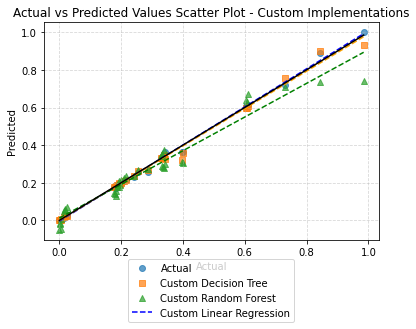

In [39]:
# Custom Decision Tree vs Custom Random Forest vs Custom Linear Regression
y_test_numeric = np.asarray(y_test, dtype=np.float64)
Custom_Decision_Tree_Regressor_Prediction_Numeric = np.asarray(Custom_Decision_Tree_Regressor_Prediction, dtype=np.float64)
Custom_Random_Forest_Regressor_Prediction_Numeric = np.asarray(Custom_Random_Forest_Regressor_Prediction, dtype=np.float64)
Custom_Linear_Regression_Prediction_Numeric = np.asarray(Custom_Linear_Regression_Prediction, dtype=np.float64)

plt.scatter(y_test, Custom_Decision_Tree_Regressor_Prediction_Numeric, alpha=0.7, marker='o', label='Custom Decision Tree')
plt.scatter(y_test, Custom_Random_Forest_Regressor_Prediction_Numeric, alpha=0.7, marker='s', label='Custom Random Forest')
plt.scatter(y_test, Custom_Linear_Regression_Prediction_Numeric, alpha=0.7, marker='^', label='Custom Linear Regression')

# Regression lines
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, Custom_Decision_Tree_Regressor_Prediction_Numeric, 1))(np.unique(y_test)), color='blue', linestyle='--')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, Custom_Random_Forest_Regressor_Prediction_Numeric, 1))(np.unique(y_test)), color='orange', linestyle='--')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, Custom_Linear_Regression_Prediction_Numeric, 1))(np.unique(y_test)), color='green', linestyle='--')

# Reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values Scatter Plot - Custom Implementations')

plt.legend(['Actual', 'Custom Decision Tree', 'Custom Random Forest', 'Custom Linear Regression'], loc='lower center', bbox_to_anchor=(0.5,-0.4))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Line Plot - Actual vs Predicted values

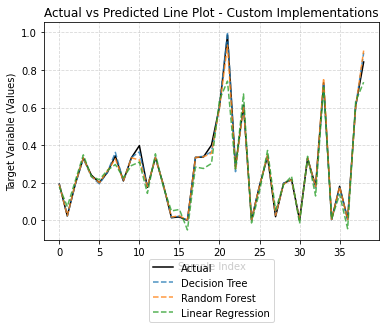

In [40]:
# Custom Decision Tree vs Custom Random Forest vs Custom Linear Regression
plt.plot(y_test.values, label='Actual', color='black', linestyle='-')
plt.plot(Custom_Decision_Tree_Regressor_Prediction, label='Decision Tree', alpha=0.8, linestyle='--')
plt.plot(Custom_Random_Forest_Regressor_Prediction, label='Random Forest', alpha=0.8, linestyle='--')
plt.plot(Custom_Linear_Regression_Prediction, label='Linear Regression', alpha=0.8, linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable (Values)')
plt.title('Actual vs Predicted Line Plot - Custom Implementations')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.4))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Residual Plots

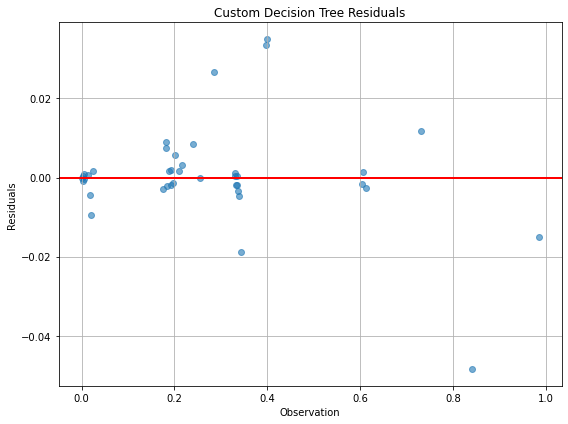

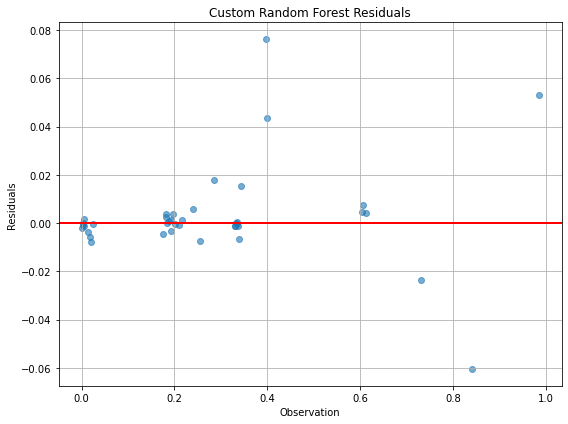

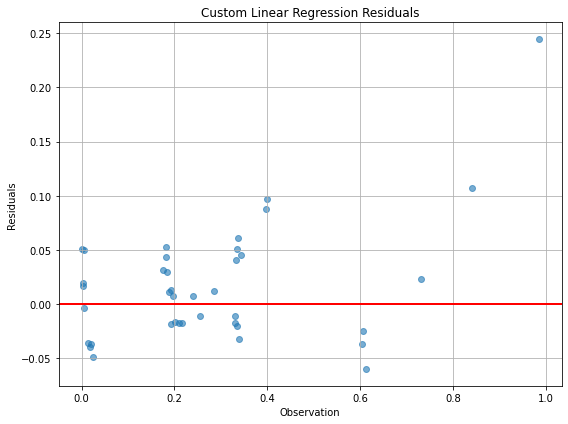

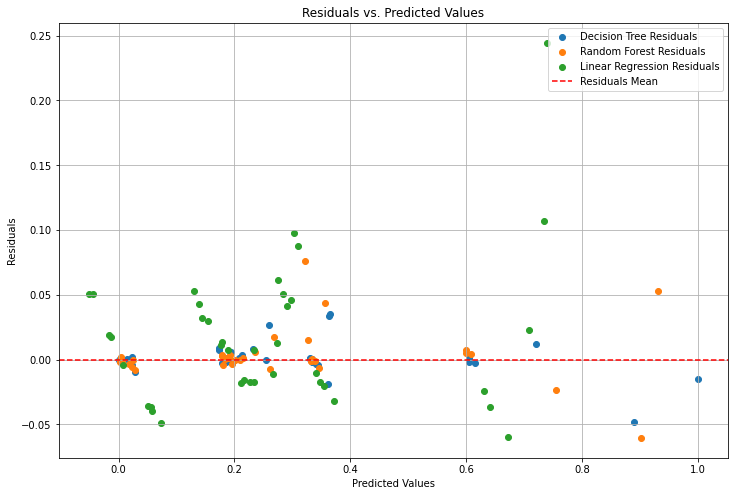

In [41]:
custom_decision_tree_residuals = y_test - Custom_Decision_Tree_Regressor_Prediction
custom_random_forest_residuals = y_test - Custom_Random_Forest_Regressor_Prediction
custom_linear_regression_residuals = y_test - Custom_Linear_Regression_Prediction

# Plot for Custom Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, custom_decision_tree_residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Custom Decision Tree Residuals')
plt.tight_layout()
plt.show()

# Plot for Custom Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, custom_random_forest_residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Custom Random Forest Residuals')
plt.tight_layout()
plt.show()

# Plot for Custom Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, custom_linear_regression_residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Custom Linear Regression Residuals')
plt.tight_layout()
plt.show()

# Residuals vs. Predicted Values for all models
plt.figure(figsize=(12, 8))
plt.scatter(Custom_Decision_Tree_Regressor_Prediction, custom_decision_tree_residuals, label='Decision Tree Residuals')
plt.scatter(Custom_Random_Forest_Regressor_Prediction, custom_random_forest_residuals, label='Random Forest Residuals')
plt.scatter(Custom_Linear_Regression_Prediction, custom_linear_regression_residuals, label='Linear Regression Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R Squared, Cross-Validation, Explained Variance

In [42]:
table_data = {
    '': ['Custom Decision Tree Regressor', 'Custom Random Forest Regressor', 'Custom Linear Regression'],
    'Mean Absolute Error (MAE)': [Custom_Decision_Tree_Regressor_Prediction_MAE, Custom_Random_Forest_Regressor_MAE, Custom_Linear_Regression_MAE],
    'Median Absolute Error (MedianAE)': [Custom_Decision_Tree_Regressor_MedianAE, Custom_Random_Forest_Regressor_MedianAE, Custom_Linear_Regression_MedianAE],
    'Mean Squared Error (MSE)': [Custom_Decision_Tree_Regressor_Prediction_MSE, Custom_Random_Forest_Regressor_MSE, Custom_Linear_Regression_MSE],
    'Root Mean Squared Error (RMSE)': [Custom_Decision_Tree_Regressor_Prediction_RMSE, Custom_Random_Forest_Regressor_RMSE, Custom_Linear_Regression_RMSE],
    'R Squared (R\u00b2)': [Custom_Decision_Tree_Regressor_Prediction_R2, Custom_Random_Forest_Regressor_R2, Custom_Linear_Regression_R2],
    'Explained Variance': [Custom_Decision_Tree_Regressor_Explained_Variance, Custom_Random_Forest_Regressor_Explained_Variance, Custom_Linear_Regression_Explained_Variance],
    'Mean Bias Deviation (MBD)': [Custom_Decision_Tree_Regressor_MBD, Custom_Random_Forest_Regressor_MBD, Custom_Linear_Regression_MBD],
    'Maximum Error': [Custom_Decision_Tree_Regressor_MaxError, Custom_Random_Forest_Regressor_MaxError, Custom_Linear_Regression_MaxError],
    'Mean Absolute Percentage Error (MAPE)': [Custom_Decision_Tree_Regressor_MAPE, Custom_Random_Forest_Regressor_MAPE, Custom_Linear_Regression_MAPE],
    'Symmetric Mean Absolute Percentage Error (SMAPE)': [Custom_Decision_Tree_Regressor_SMAPE, Custom_Random_Forest_Regressor_SMAPE, Custom_Linear_Regression_SMAPE]
}

print(tabulate(table_data, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════╤══════════════════════════════════╤══════════════════╤══════════════════════╤═════════════════════════════╤═════════════════╤═════════════════════════════════════════╤════════════════════════════════════════════════════╕
│                                │   Mean Absolute Error (MAE) │   Median Absolute Error (MedianAE) │   Mean Squared Error (MSE) │   Root Mean Squared Error (RMSE) │   R Squared (R²) │   Explained Variance │   Mean Bias Deviation (MBD) │   Maximum Error │   Mean Absolute Percentage Error (MAPE) │   Symmetric Mean Absolute Percentage Error (SMAPE) │
╞════════════════════════════════╪═════════════════════════════╪════════════════════════════════════╪════════════════════════════╪══════════════════════════════════╪══════════════════╪══════════════════════╪═════════════════════════════╪═════════════════╪═════════════════════════════════════════╪═

# Actual vs Predicted Values

╒═════════════════╤══════════════════════════════════╤══════════════════════════════════╤════════════════════════════╕
│   Actual Values │   Custom Decision Tree Regressor │   Custom Random Forest Regressor │   Custom Linear Regression │
╞═════════════════╪══════════════════════════════════╪══════════════════════════════════╪════════════════════════════╡
│      0.19249    │                      0.194303    │                       0.191124   │                  0.179183  │
├─────────────────┼──────────────────────────────────┼──────────────────────────────────┼────────────────────────────┤
│      0.0241872  │                      0.0225487   │                       0.024452   │                  0.0729576 │
├─────────────────┼──────────────────────────────────┼──────────────────────────────────┼────────────────────────────┤
│      0.193162   │                      0.191228    │                       0.196538   │                  0.211143  │
├─────────────────┼─────────────────────────────

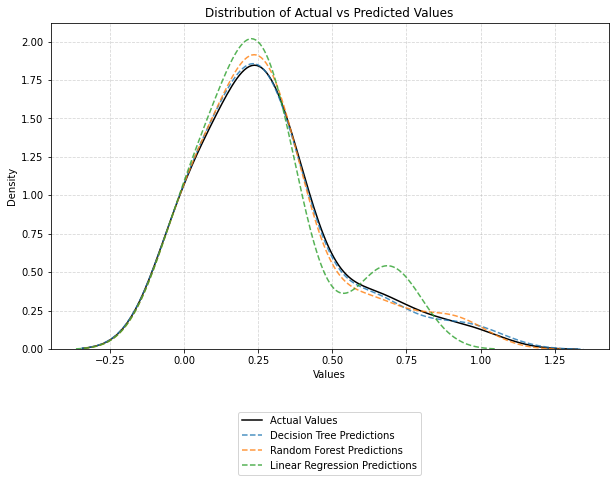

In [43]:
results_table_data = {
    'Actual Values': y_test,
    'Custom Decision Tree Regressor': Custom_Decision_Tree_Regressor_Prediction,
    'Custom Random Forest Regressor': Custom_Random_Forest_Regressor_Prediction,
    'Custom Linear Regression': Custom_Linear_Regression_Prediction
}

print(tabulate(results_table_data, headers='keys', tablefmt='fancy_grid'))

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Values', color='black', linestyle='-')
sns.kdeplot(Custom_Decision_Tree_Regressor_Prediction, label='Decision Tree Predictions', alpha=0.8, linestyle='--')
sns.kdeplot(Custom_Random_Forest_Regressor_Prediction, label='Random Forest Predictions', alpha=0.8, linestyle='--')
sns.kdeplot(Custom_Linear_Regression_Prediction, label='Linear Regression Predictions', alpha=0.8, linestyle='--')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.4))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()